<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/10_TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#텐서플로우 2.xx버젼 공부 내용

##Eager Execution 즉시 실행 모드

In [68]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt

tf.__version__

'2.8.2'

In [ ]:
a=tf.constant(10)
b=tf.constant(20)

c=a+b
d=(a+b).numpy()

print(type(c))
print(c)
print(type(d),d)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)
<class 'numpy.int32'> 30


In [ ]:
d_numpy_to_tensor=tf.convert_to_tensor(d)
print(type(d_numpy_to_tensor))
print(d_numpy_to_tensor)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)


In [ ]:
W=tf.Variable(tf.random.normal([1]))#가우시안 분포

print('W=',W.numpy())

for step in range(2):
  W=W+1.0
  print('step:',step,'W=',W.numpy())


W= [-0.9654]
step: 0 W= [0.03460002]
step: 1 W= [1.0346]


#케라스 Keras
## TF 2.x 에서는 공식적이고 유일한 High-Level API로 Keras 채택

##특징

- User Friendliness: Keras의 직관적인 API를 이용하면 일반 신경망(ANN),CNN,RNN 모델 또는 이를 조합한 다양한 딥러닝 모델을 (몇 줄의 코드만으로) 쉽게 구축 할 수 있음

- Modularity: Keras에서 제공하는 모듈은 독립적으로 설정 가능함, 즉 신경망 층, 손실함수, 활성화 함수, 최적화 알고리즘 등은 모두 독립적인 모듈이기 때문에 이러한 모듈을 서로 조합하기만 하면 새로운 딥러닝 모델을 쉽고 빠르게 만들어서 학습시킬 수 있음



    Keras 가장 핵심적인 데이터 구조는 모델(model)





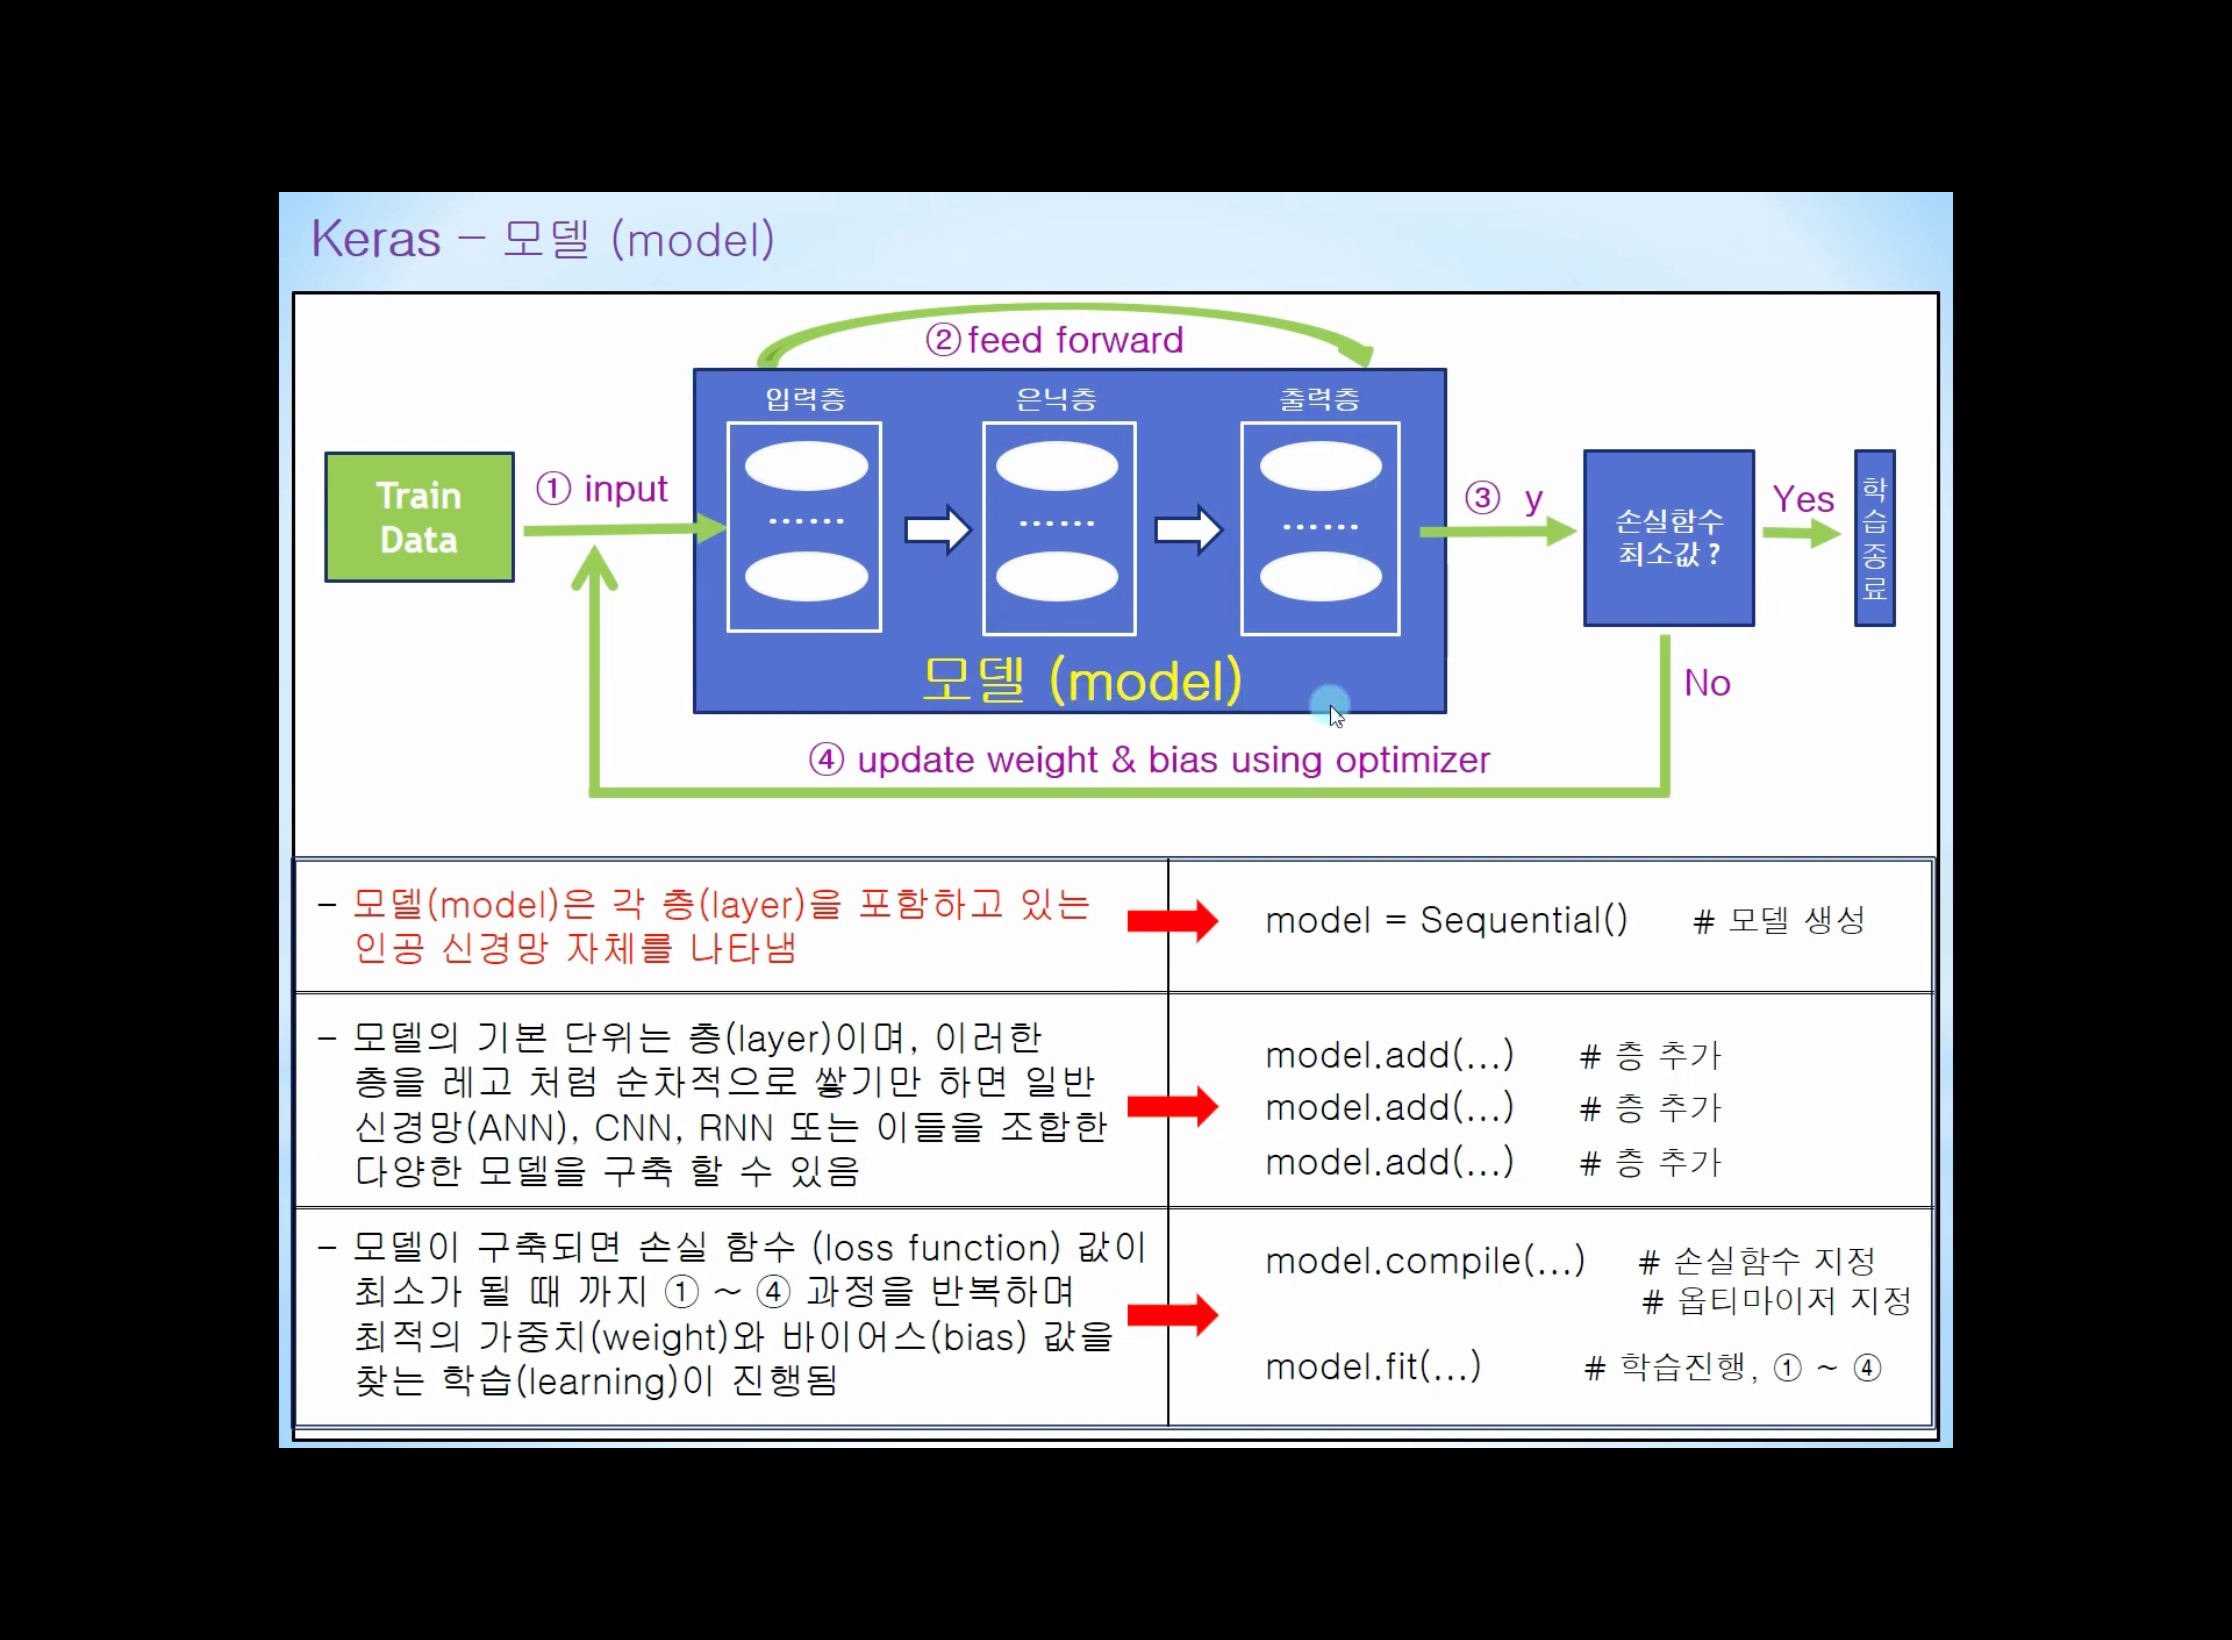

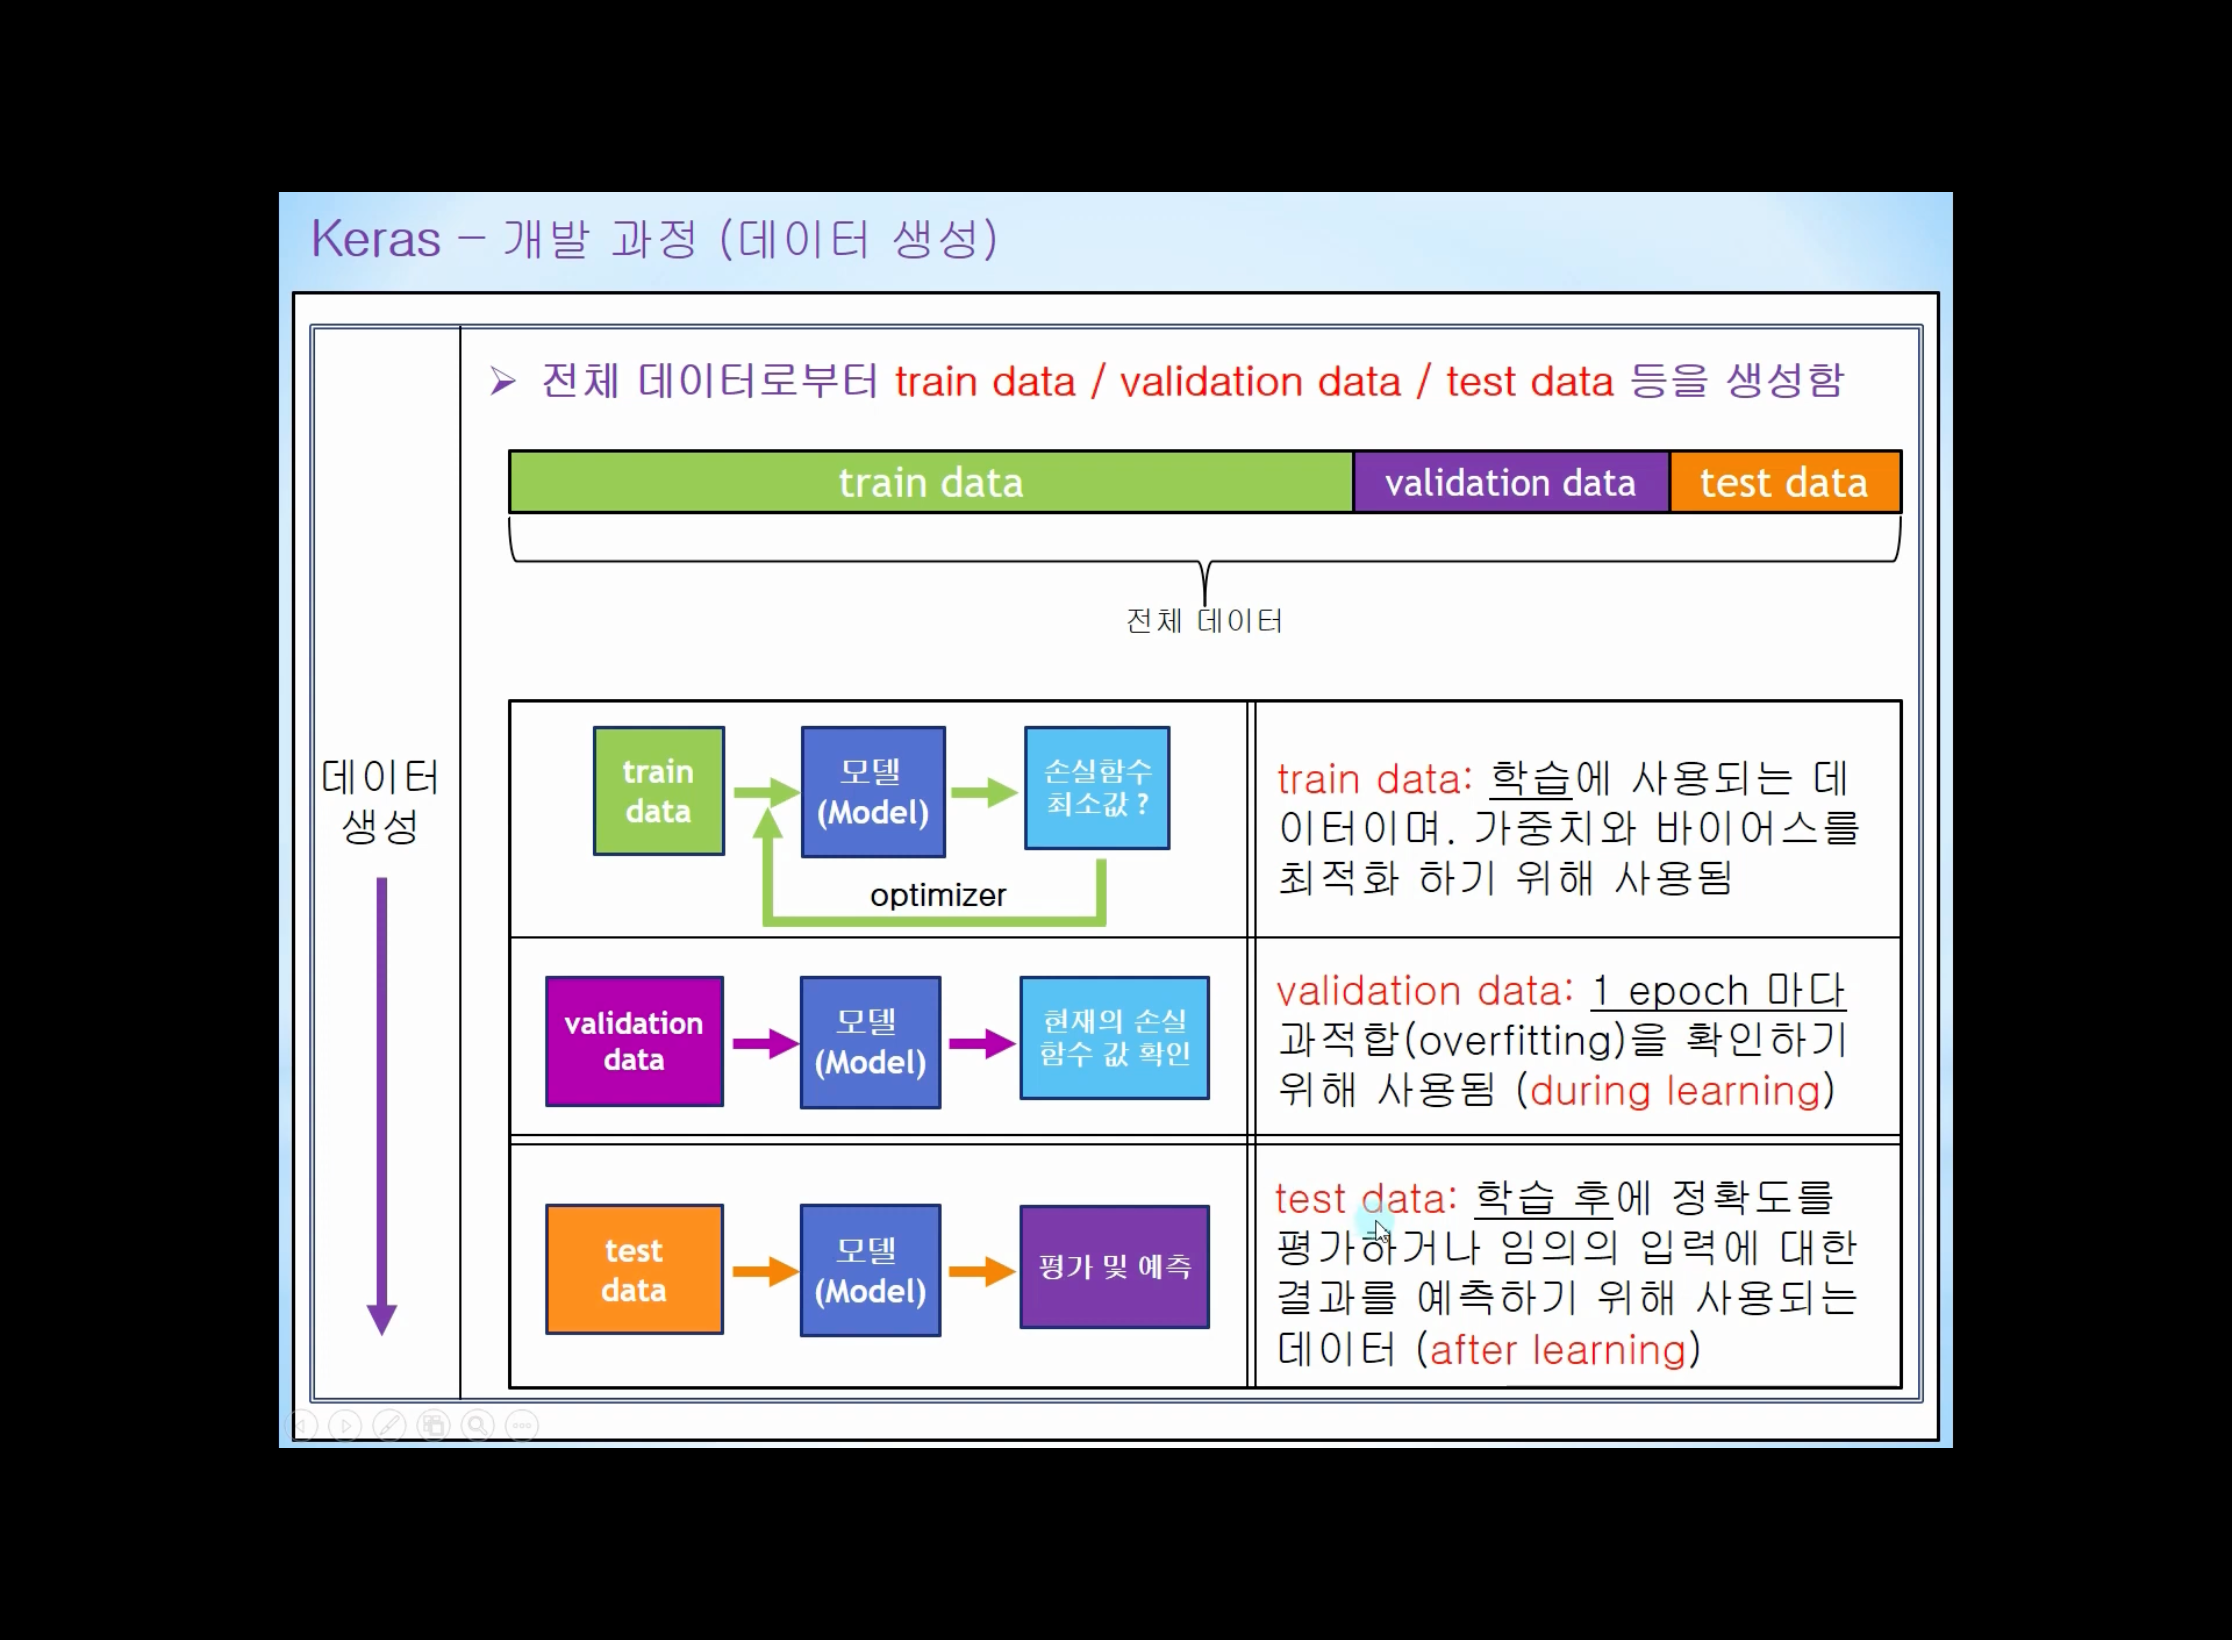

#모델 실행 순서와 코드 예제
##모델 구축

model=Sequential()
model.add(Flatten(input_shape=(1,))
model.add(Dence(2,activation='sigmoid'))
...

위의 2개를 합쳐서
model.add(Dence(2,activation='sigmoid',input_shape(1,)))

##모델 컴파일

model.compile(optimizer=SGD(learning_rate=0.1),loss='mse',metrics=['accurancy'])
model.compile(optimizer=Adam(learning_rate=1e-4),loss='catagorical_crossentropy')

- 메트릭은 기본적으로 loss만 측정함

##모델학습

model.fit(x_train,t_train,epochs=10,batch_size=100,verboss=0,validation_split=0.2)

- validation_split:학습데이터의 20%는 검증데이터로 실행하라

##모델 평가

model.evaluate(x_test,t_test,epochs=10, batch_size=100)

model.predict(x_input_data,batch_size=100)

##모델 저장

model.save('model_name.h5')

- 학습이 끝난 모델을 hdf5 파일에 저징힘

model=tensorflow.keras.models.load_model('model_name.h5')

- 저장된 모델 호출


In [80]:
x_data=np.array([1,2,3,4,5,6])
t_data=np.array([3,4,5,6,7,8])

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(1,)))
model.add(tf.keras.layers.Dense(1,activation='linear'))
#model.add(tf.keras.layers.Dense(1,input_shape=(1,),activation='linear')) 도 가능

In [81]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.fit(x_data,t_data,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2181
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2165
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2150
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2134
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2118
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2103
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2088
Epoch 8/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2072
Epoch 9/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2057
Epoch 10/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2042
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2027
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2013
Epoch 13/1000
1/1 [====================

In [85]:
result=model.predict(np.array([-3.1,3.0,3.5,15.0,20.1]))
print(result)

[[-1.1474177]
 [ 4.99177  ]
 [ 5.494982 ]
 [17.068861 ]
 [22.201624 ]]
